In [28]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

In [29]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    """ 
    Read images from subdirectories of img_dir
     nmax images read in each directory at most
     Returns:
     X: list of images read, xdim*ydim matrices
     y: list of numeric labels
     label: number of labels
     label_names: list of names of directories read
    """
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) # Reading image from directory
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert Colors to RGB
            img = cv2.resize(img, (xdim,ydim)) # Resizing
            X.append(np.array(img)) # Convert to table and add to image list
            y.append(label) # Added image tag to tag list
            n=n+1
        print(n,' images read')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() # Memory recovery
    return X,y, label, label_names

In [30]:
X_train,y_train,Nombre_classes,Classes = lire_images("Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train", 224, 224, 1000)

actinic keratosis
114  images read
basal cell carcinoma
376  images read
dermatofibroma
95  images read
melanoma
438  images read
nevus
357  images read
pigmented benign keratosis
462  images read
seborrheic keratosis
77  images read
squamous cell carcinoma
181  images read
vascular lesion
139  images read


In [32]:
X_test,y_test,Nombre_classes,Classes = lire_images("Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train", 224, 224,1000)

actinic keratosis
114  images read
basal cell carcinoma
376  images read
dermatofibroma
95  images read
melanoma
438  images read
nevus
357  images read
pigmented benign keratosis
462  images read
seborrheic keratosis
77  images read
squamous cell carcinoma
181  images read
vascular lesion
139  images read


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Nombre_classes)

(2239, 224, 224, 3)
(2239,)
(2239, 224, 224, 3)
(2239,)
9


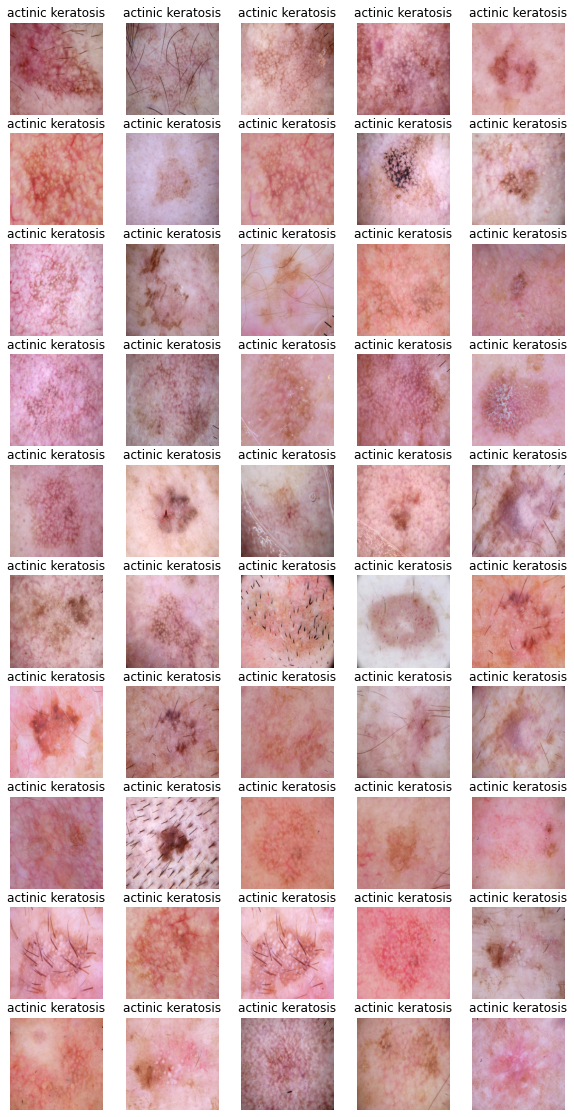

In [34]:
plt.figure(figsize=(10,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i])
    plt.title(Classes[int(y_test[i])])

In [35]:
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train[0, :])
print(y_test[0, :])

(2239, 224, 224, 3)
(2239, 224, 224, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Dense**

In [37]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

**CNN**

In [38]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(Nombre_classes, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
train_cnn = model_cnn.fit(X_train, 
                          y_train, 
                          validation_data=(X_test, y_test), 
                          epochs=100, 
                          batch_size=200, 
                          verbose=1)

model_cnn.summary()

Epoch 1/110
12/12 [==============================] - 190s 10s/step - loss: 0.6899 - accuracy: 0.7865 - val_loss: 0.6600 - val_accuracy: 0.7704
Epoch 2/110
12/12 [==============================] - 60s 4s/step - loss: 0.6242 - accuracy: 0.8124 - val_loss: 0.5478 - val_accuracy: 0.8374
Epoch 3/110
12/12 [==============================] - 52s 4s/step - loss: 0.5808 - accuracy: 0.8227 - val_loss: 0.4772 - val_accuracy: 0.8589
Epoch 4/110
12/12 [==============================] - 36s 3s/step - loss: 0.5112 - accuracy: 0.8450 - val_loss: 0.5360 - val_accuracy: 0.8142
Epoch 5/110
12/12 [==============================] - 36s 3s/step - loss: 0.4838 - accuracy: 0.8468 - val_loss: 0.4587 - val_accuracy: 0.8705
Epoch 6/110
12/12 [==============================] - 35s 3s/step - loss: 0.4996 - accuracy: 0.8548 - val_loss: 0.4767 - val_accuracy: 0.8852
Epoch 7/110
12/12 [==============================] - 35s 3s/step - loss: 0.4354 - accuracy: 0.8808 - val_loss: 0.3526 - val_accuracy: 0.8897
Epoch 8/110

In [43]:
scores = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 93.84%
